# Master Pytorch 8 : Basic with Sequence
- 앞에 진행했던 Basic을 Sequence로 입력해서 학습

In [1]:
import torch

letters = ['h', 'i', 'e', 'l', 'o']

# hihell -> ihello

x_data = [0, 1, 0, 2, 3, 3]
y_data = [1, 0, 2, 3, 3, 4]

inputs = torch.zeros(1, len(x_data), len(letters))
for i, idx in enumerate(x_data):
    inputs[0][i][idx] = 1

labels = torch.LongTensor(y_data)

print(inputs)
print(labels)

tensor([[[1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0.],
         [1., 0., 0., 0., 0.],
         [0., 0., 1., 0., 0.],
         [0., 0., 0., 1., 0.],
         [0., 0., 0., 1., 0.]]])
tensor([1, 0, 2, 3, 3, 4])


In [2]:
import torch.nn as nn
import torch.optim as optim

class_n = 5
input_size = 5
hidden_size = 5
batch_size = 1
seq_n = 6
layer_n = 1

class RNN(nn.Module):
    
    def __init__(self, class_n, input_size, hidden_size, layer_n):
        super(RNN, self).__init__()
        
        self.class_n = class_n
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.layer_n = layer_n
        self.seq_n = seq_n
        
        self.rnn = nn.RNN(input_size = 5, hidden_size = 5,
                          batch_first = True)
        
    def forward(self, x):
        h0 = torch.zeros(self.layer_n, x.size(0), self.hidden_size) # (layer_nXdirection_n) X batch_size X hidden_size 
        x = x.view(self.seq_n, x.size(0), self.input_size) # input = (seq_n, batch_size, input_size)
        
        output, _ = self.rnn(x, h0)
        
        return output.view(-1, class_n)               

model = RNN(class_n, input_size, hidden_size, layer_n)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.1)

print(model)

RNN(
  (rnn): RNN(5, 5, batch_first=True)
)


In [3]:
epoch_n = 100

for epoch in range(epoch_n):
    
    outputs = model(inputs)
    
    optimizer.zero_grad()
    loss = loss_function(outputs, labels)
    
    loss.backward()
    optimizer.step()
    
    val, idx = outputs.max(1)
    for i in idx.data:
        print(letters[i], end = '')
        
    print(' Epoch : %d/100, Loss : %1.3f' %(epoch + 1, loss))

ililll Epoch : 1/100, Loss : 1.483
ililll Epoch : 2/100, Loss : 1.469
ililll Epoch : 3/100, Loss : 1.456
ililll Epoch : 4/100, Loss : 1.443
ililll Epoch : 5/100, Loss : 1.430
ililll Epoch : 6/100, Loss : 1.417
ililll Epoch : 7/100, Loss : 1.405
ililll Epoch : 8/100, Loss : 1.392
ililll Epoch : 9/100, Loss : 1.381
ililll Epoch : 10/100, Loss : 1.369
ililll Epoch : 11/100, Loss : 1.358
ililll Epoch : 12/100, Loss : 1.347
ililll Epoch : 13/100, Loss : 1.336
ililll Epoch : 14/100, Loss : 1.326
ililll Epoch : 15/100, Loss : 1.316
ililll Epoch : 16/100, Loss : 1.306
ililll Epoch : 17/100, Loss : 1.296
ililll Epoch : 18/100, Loss : 1.287
ililll Epoch : 19/100, Loss : 1.278
ililll Epoch : 20/100, Loss : 1.269
ililll Epoch : 21/100, Loss : 1.260
ilelll Epoch : 22/100, Loss : 1.252
ilelll Epoch : 23/100, Loss : 1.244
ilelll Epoch : 24/100, Loss : 1.236
ilelll Epoch : 25/100, Loss : 1.228
ilelll Epoch : 26/100, Loss : 1.220
ilelll Epoch : 27/100, Loss : 1.212
ilelll Epoch : 28/100, Loss : 1.205
i

In [5]:
for p in model.parameters():
    print(p.size())

torch.Size([5, 5])
torch.Size([5, 5])
torch.Size([5])
torch.Size([5])


# 스스로 해보기

In [4]:
# hihell -> ihello
import torch

letters = ['h', 'i', 'e', 'l', 'o']
x_data = [0, 1, 0, 2, 3, 3]
y_data = [1, 0, 2, 3, 3, 4]

inputs = torch.zeros(1, len(x_data), len(letters))
for i, idx in enumerate(x_data):
    inputs[0][i][idx] = 1
    
labels = torch.Tensor(y_data).long()

print(inputs)
print(labels)

tensor([[[1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0.],
         [1., 0., 0., 0., 0.],
         [0., 0., 1., 0., 0.],
         [0., 0., 0., 1., 0.],
         [0., 0., 0., 1., 0.]]])
tensor([1, 0, 2, 3, 3, 4])


In [5]:
import torch.nn as nn

class_n = 5
input_size = 5
hidden_size = 5
batch_size = 1
seq_n = 6
layer_n = 1

class RNN(nn.Module):
    
    def __init__(self, input_size, hidden_size, class_n, layer_n):
        super(RNN, self).__init__()
        
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.class_n = class_n
        self.layer_n = layer_n
        
        self.rnn = nn.RNN(input_size, hidden_size, batch_first = True)
        
    def forward(self, x):
        
        h0 = torch.zeros(layer_n, batch_size, self.hidden_size)
        x = x.view(batch_size, seq_n, self.input_size)
        
        output, _ = self.rnn(x, h0)
        
        return output.view(-1, self.class_n)
    
model = RNN(input_size, hidden_size, class_n, layer_n)
print(model)

RNN(
  (rnn): RNN(5, 5, batch_first=True)
)


In [6]:
import torch.optim as optim

optimizer = optim.SGD(model.parameters(), lr = 0.1)
loss_function = nn.CrossEntropyLoss()

epoch_n = 100
loss_list = []

for epoch in range(1, epoch_n):
    
    optimizer.zero_grad()
    loss = 0
    output = model(inputs)
    
    loss = loss_function(output, labels)
    loss.backward()
    optimizer.step()
    
    val, idx = output.max(1)
    for i in idx:
        print(letters[i], end = '')

    if epoch % 10 == 0:
        print(' Epoch : %d/100, Loss : %1.3f' %(epoch, loss))
    else:
        print('')
    loss_list.append(loss)

looooo
lolooo
lolooo
lllooo
lllloo
lllloo
lllloo
lllloo
lllllo
lllllo Epoch : 10/100, Loss : 1.430
llllll
llllll
llllll
llllll
llllll
llllll
llllll
llllll
llllll
lellll Epoch : 20/100, Loss : 1.317
lellll
iellll
iellll
iellll
iellll
iellll
iellll
iellll
iellll
iellll Epoch : 30/100, Loss : 1.236
ieelll
ieelll
ieelll
ieelll
ieelll
ieelll
ieelll
ieelll
ieello
ieello Epoch : 40/100, Loss : 1.157
ieello
ieello
ieello
ieello
ieello
ieello
ieello
ieello
ieello
ieello Epoch : 50/100, Loss : 1.082
ieello
ieello
ieello
ieello
ieello
ieello
ieello
ieello
ihello
ihello Epoch : 60/100, Loss : 1.015
ihello
ihello
ihello
ihello
ihello
ihello
ihello
ihello
ihello
ihello Epoch : 70/100, Loss : 0.958
ihello
ihello
ihello
ihello
ihello
ihello
ihello
ihello
ihello
ihello Epoch : 80/100, Loss : 0.910
ihello
ihello
ihello
ihello
ihello
ihello
ihello
ihello
ihello
ihello Epoch : 90/100, Loss : 0.869
ihello
ihello
ihello
ihello
ihello
ihello
ihello
ihello
ihello


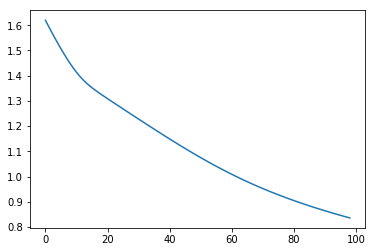

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(loss_list)

# 한글 버젼
- 한글로 학습 시도
- sequence의 길이를 늘려서 시도

In [8]:
from konlpy.tag import Okt

okt = Okt()

my_string = '행복은 항상 미래에 있다'
letters = [val for val, pos in okt.pos(my_string)] + [' ']
print(letters, len(letters))

# 행복은 항상 미래에 -> 은 항상 미래에 있다
import torch

x_data = [0, 1, 6, 2, 6, 3, 4, 6] # 행복은 항상 미래에
y_data = [1, 6, 2, 6, 3, 4, 6, 5] # 은 항상 미래에 있다

inputs = torch.zeros(1, len(x_data), len(letters))
for i, idx in enumerate(x_data):
    inputs[0][i][idx] = 1

labels = torch.LongTensor(y_data)

print(inputs)
print(labels)

['행복', '은', '항상', '미래', '에', '있다', ' '] 7
tensor([[[1., 0., 0., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 1.],
         [0., 0., 1., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 1.],
         [0., 0., 0., 1., 0., 0., 0.],
         [0., 0., 0., 0., 1., 0., 0.],
         [0., 0., 0., 0., 0., 0., 1.]]])
tensor([1, 6, 2, 6, 3, 4, 6, 5])


In [9]:
import torch.nn as nn
import torch.optim as optim

class_n = len(letters) # 7
input_size = len(letters) # 7
hidden_size = 7 # input_size와 같다
batch_size = 1
seq_n = 8
layer_n = 1

class RNN(nn.Module):
    
    def __init__(self, input_size, hidden_size, class_n, layer_n):
        super(RNN, self).__init__()
        
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.class_n = class_n
        self.layer_n = layer_n
        self.seq_n = seq_n
        
        self.rnn = nn.RNN(input_size = 7, hidden_size = 7, batch_first = True)
        
    def forward(self, x):
        h0 = torch.Tensor(self.layer_n, batch_size, hidden_size)
        x = x.view(batch_size, self.seq_n, -1)
        
        output, _ = self.rnn(x, h0)
        
        return output.view(-1, self.class_n)

model = RNN(input_size, hidden_size, class_n, layer_n)
print(model)

RNN(
  (rnn): RNN(7, 7, batch_first=True)
)


In [10]:
import torch.optim as optim

loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.1)

epoch_n = 100
loss_list = []

for epoch in range(1, epoch_n):
    optimizer.zero_grad()
    
    output = model(inputs)
    
    loss = loss_function(output, labels)
    loss.backward()
    optimizer.step()
    
    val, idx = output.max(1)
    for i in idx.data:
        print(letters[i], end = '')
    print(' Epoch : %d/100, Loss = %1.3f' %(epoch, loss))
    loss_list.append(loss)

에에    행복  Epoch : 1/100, Loss = 2.051
행복에     미래 Epoch : 2/100, Loss = 1.971
미래행복     미래 Epoch : 3/100, Loss = 1.725
       미래 Epoch : 4/100, Loss = 1.549
  미래 미래에 미래 Epoch : 5/100, Loss = 1.429
  미래 미래에 있다 Epoch : 6/100, Loss = 1.313
미래 항상 항상에 있다 Epoch : 7/100, Loss = 1.388
에 항상 미래에 있다 Epoch : 8/100, Loss = 1.211
있다 항상 미래에 있다 Epoch : 9/100, Loss = 1.228
  항상 미래에 있다 Epoch : 10/100, Loss = 1.167
은 항상 항상에 있다 Epoch : 11/100, Loss = 0.995
있다 항상 미래에 있다 Epoch : 12/100, Loss = 1.020
있다 항상 미래에 있다 Epoch : 13/100, Loss = 0.976
  항상 미래에 있다 Epoch : 14/100, Loss = 1.056
은 미래 미래에 있다 Epoch : 15/100, Loss = 1.001
은 미래 미래에 있다 Epoch : 16/100, Loss = 0.980
에 있다 미래에 있다 Epoch : 17/100, Loss = 0.975
은 미래 미래에 있다 Epoch : 18/100, Loss = 0.968
은 항상 미래에 있다 Epoch : 19/100, Loss = 0.870
행복있다항상 미래에 있다 Epoch : 20/100, Loss = 1.092
은 항상 미래에 있다 Epoch : 21/100, Loss = 0.791
은 항상 미래에 있다 Epoch : 22/100, Loss = 0.829
은 항상 미래에 있다 Epoch : 23/100, Loss = 0.790
은 항상 미래에 있다 Epoch : 24/100, Loss = 0.769
은 항상 미래에 있다 Epoch : 25/1

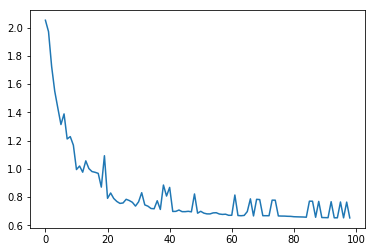

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(loss_list)